# Student's t distribution: one tailed test

In [1]:
import numpy as np
from scipy.stats import t
from scipy.integrate import quad
from scipy.optimize import brentq

# Degrees of freedom, 1-12
dof_values = np.arange(1, 13) 

# Common confidence values
confidence_values = [0.8, 0.9, 0.95, 0.99] 

# Loop over DOF and Confidence values
table = np.zeros((len(dof_values), len(confidence_values)))
for i, nu in enumerate(dof_values): 
    
    # Student's t distribution
    pdf = t(nu).pdf 
    
    for j, con in enumerate(confidence_values):
        
        # Desired area in the (single) tail
        P = 1 - con 
        
        # Search interval for root finding algorithm
        low, up = 0, 40
        
        # Solve for critical value with desired area in tail
        table[i,j] = brentq(lambda x: P-quad(pdf, x, np.inf)[0], low, up)
        

In [2]:
import pandas as pd

pd.DataFrame(table, columns=confidence_values, index=dof_values)


,0.80,0.90,0.95,0.99
1,1.376382,3.077684,6.313752,31.820516
2,1.060660,1.885618,2.919986,6.964557
3,0.978472,1.637744,2.353363,4.540703
4,0.940965,1.533206,2.131847,3.746947
5,0.919544,1.475884,2.015048,3.364930
6,0.905703,1.439756,1.943180,3.142668
7,0.896030,1.414924,1.894579,2.997952
8,0.888890,1.396815,1.859548,2.896459
9,0.883404,1.383029,1.833113,2.821438
10,0.879058,1.372184,1.812461,2.763769


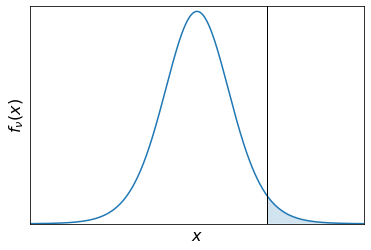

In [25]:
import matplotlib.pyplot as plt

x_vals = np.linspace(-5, 5, 1000)
plt.plot(x_vals, t(nu).pdf(x_vals))

x_vals = np.linspace(2.1, 5, 100)
plt.axvline(2.1, c='k', lw=1)
plt.fill_between(x_vals,t(nu).pdf(x_vals), 0, alpha=0.2)

plt.xlim(-5, 5); plt.ylim(0, 0.4)
plt.xticks([]); plt.yticks([])
plt.xlabel(r"$x$", size=16); plt.ylabel(r"$f_{\nu}(x)$", size=16)

plt.show()


# $\chi^2$ distribution: one tailed test

In [5]:
from scipy.stats import chi2

# Degrees of freedom, 1-12
dof_values = np.arange(1, 13) 

# Common confidence values
confidence_values = [0.8, 0.9, 0.95, 0.99] 

# Loop over DOF and Confidence values
table = np.zeros((len(dof_values), len(confidence_values)))
for i, nu in enumerate(dof_values): 
    
    # Student's t distribution
    pdf = chi2(nu).pdf 
    
    for j, con in enumerate(confidence_values):
        
        # Desired area in the (single) tail
        P = 1 - con 
        
        # Search interval for root finding algorithm
        low, up = 0, 40
        
        # Solve for critical value with desired area in tail
        table[i,j] = brentq(lambda x: P-quad(pdf, x, np.inf)[0], low, up)
        

In [6]:
pd.DataFrame(table, columns=confidence_values, index=dof_values)


,0.80,0.90,0.95,0.99
1,1.642374,2.705543,3.841459,6.634897
2,3.218876,4.605170,5.991465,9.210340
3,4.641628,6.251389,7.814728,11.344867
4,5.988617,7.779440,9.487729,13.276704
5,7.289276,9.236357,11.070498,15.086272
6,8.558060,10.644641,12.591587,16.811894
7,9.803250,12.017037,14.067140,18.475307
8,11.030091,13.361566,15.507313,20.090235
9,12.242145,14.683657,16.918978,21.665994
10,13.441958,15.987179,18.307038,23.209251


# KS Test